# Movie Data Analysis

## Goals

There are 3 goals that will help the Movie Studio decide on what type of fims to create!
1. Identifying what film genres are doing the best at the box office.

2. Determining the best runtime depending on box office success.

3. Exploring which director will allow the most success.

## Data

In [142]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sqlite3

In [143]:
bom_data = pd.read_csv('bom.movie_gross.csv.gz')
bom_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [144]:
conn = sqlite3.connect('im.db/im.db')

In [145]:
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [146]:
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [147]:
pd.read_sql("""SELECT * FROM directors;""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [148]:
pd.read_sql("""SELECT * FROM persons;""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


## Methods

In [149]:
directors = pd.read_sql("""
SELECT
    p.person_id,
    p.primary_name,
    p.birth_year,
    d.movie_id
FROM
    persons p
    INNER JOIN directors d
        ON p.person_id = d.person_id;""",conn)

directors

,person_id,primary_name,birth_year,movie_id
0,nm0062879,Ruel S. Bayani,NaN,tt1592569
1,nm0062879,Ruel S. Bayani,NaN,tt1592569
2,nm0062879,Ruel S. Bayani,NaN,tt1592569
3,nm0062879,Ruel S. Bayani,NaN,tt1592569
4,nm0062879,Ruel S. Bayani,NaN,tt2057445
...,...,...,...,...
291166,nm9980896,Rama Narayanan,NaN,tt8715016
291167,nm9980896,Rama Narayanan,NaN,tt8919136
291168,nm9981679,Samir Eshra,NaN,tt8717234
291169,nm9993380,Pegasus Envoyé,NaN,tt8743182


In [150]:
directors_with_basics = pd.merge(directors, movie_basics, how='inner', on='movie_id')
combined_data = pd.merge(directors_with_basics, movie_ratings, how='inner', on='movie_id')
combined_data

,person_id,primary_name,birth_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,nm0062879,Ruel S. Bayani,NaN,tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
1,nm0062879,Ruel S. Bayani,NaN,tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
2,nm0062879,Ruel S. Bayani,NaN,tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
3,nm0062879,Ruel S. Bayani,NaN,tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
4,nm0062879,Ruel S. Bayani,NaN,tt2057445,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller",6.4,256
...,...,...,...,...,...,...,...,...,...,...,...
181382,nm9748617,Frank W Chen,NaN,tt8234502,Late Life: The Chien-Ming Wang Story,Late Life: The Chien-Ming Wang Story,2018,99.0,"Documentary,Sport",5.8,281
181383,nm9748617,Frank W Chen,NaN,tt8234502,Late Life: The Chien-Ming Wang Story,Late Life: The Chien-Ming Wang Story,2018,99.0,"Documentary,Sport",5.8,281
181384,nm9769561,Prasobh Vijayan,NaN,tt8273258,Lilli,Lilli,2018,91.0,Thriller,5.7,193
181385,nm9781362,Grzegorz Jankowski,NaN,tt4438688,Polskie gówno,Polskie gówno,2014,93.0,"Comedy,Musical",5.2,215


In [151]:
combined_df = combined_data.copy()

In [152]:
combined_df = combined_df[['primary_name', 'birth_year', 'primary_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes']]
combined_df

,primary_name,birth_year,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Ruel S. Bayani,NaN,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
1,Ruel S. Bayani,NaN,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
2,Ruel S. Bayani,NaN,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
3,Ruel S. Bayani,NaN,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
4,Ruel S. Bayani,NaN,No Other Woman,2011,101.0,"Drama,Romance,Thriller",6.4,256
...,...,...,...,...,...,...,...,...
181382,Frank W Chen,NaN,Late Life: The Chien-Ming Wang Story,2018,99.0,"Documentary,Sport",5.8,281
181383,Frank W Chen,NaN,Late Life: The Chien-Ming Wang Story,2018,99.0,"Documentary,Sport",5.8,281
181384,Prasobh Vijayan,NaN,Lilli,2018,91.0,Thriller,5.7,193
181385,Grzegorz Jankowski,NaN,Polskie gówno,2014,93.0,"Comedy,Musical",5.2,215


In [153]:
combined_df = combined_df.sort_values(by='averagerating', ascending=False)
combined_df.head()

,primary_name,birth_year,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
173907,Michael J. Sanderson,1983.0,The Paternal Bond: Barbary Macaques,2015,59.0,Documentary,10.0,5
68857,Mohamed Ulad-Mohand,NaN,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
138141,Taylor Morden,NaN,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5
164999,Chad Carpenter,NaN,Dog Days in the Heartland,2017,NaN,Drama,10.0,5
147832,Stephen Peek,NaN,Renegade,2019,NaN,Documentary,10.0,20


In [154]:
filtered_df = combined_df[combined_df['numvotes'] >= 2000]
sorted_df = filtered_df.sort_values(by='numvotes', ascending=False)
sorted_df.head()

,primary_name,birth_year,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
13971,Christopher Nolan,1970.0,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
13969,Christopher Nolan,1970.0,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
13968,Christopher Nolan,1970.0,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
13970,Christopher Nolan,1970.0,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
13967,Christopher Nolan,1970.0,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769


In [155]:
clean_df = sorted_df.drop_duplicates()
clean_df

,primary_name,birth_year,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
13971,Christopher Nolan,1970.0,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
13969,Christopher Nolan,1970.0,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
13965,Christopher Nolan,1970.0,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
34929,Quentin Tarantino,1963.0,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
77574,Joss Whedon,1964.0,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...
84359,Eliza Hittman,NaN,It Felt Like Love,2013,82.0,Drama,5.5,2004
156878,Hemanth M. Rao,NaN,Godhi Banna Sadharana Mykattu,2016,144.0,"Drama,Family",8.9,2001
53189,Tommy Bertelsen,NaN,Feed,2017,95.0,Drama,6.2,2000
156514,Simon Phillips,NaN,Love Never Dies,2012,121.0,"Drama,Music,Musical",7.0,2000


In [156]:
filtered_df = combined_df[combined_df['numvotes'] >= 2000].copy()
C = filtered_df['averagerating'].mean()
m = filtered_df['numvotes'].quantile(0.90)

def weighted_rating(x, m=m, C=C):
    v = x['numvotes']
    R = x['averagerating']
    return (v / (v + m) * R) + (m / (v + m) * C)

filtered_df['weighted_rating'] = filtered_df.apply(weighted_rating, axis=1)

sorted_df = filtered_df.sort_values(by='weighted_rating', ascending=False)

sorted_duplicates = sorted_df.drop_duplicates()

intouchables_df = sorted_duplicates[sorted_duplicates['primary_title'] == 'The Intouchables']

intouchables_merged = intouchables_df.groupby([
    'primary_title', 
    'start_year', 
    'runtime_minutes', 
    'genres', 
    'averagerating', 
    'numvotes', 
    'weighted_rating'
]).agg({'primary_name': ', '.join}).reset_index()

non_intouchables_df = sorted_duplicates[sorted_duplicates['primary_title'] != 'The Intouchables']

intouchables_concat = pd.concat([non_intouchables_df, intouchables_merged])

intouchable_concat = intouchables_concat.drop_duplicates()

highest_rated_movies = intouchable_concat.rename(columns={'primary_name': 'Director'})
highest_rated_movies = highest_rated_movies.drop(columns=['birth_year'])
highest_rated_movies = highest_rated_movies.rename(columns={
    'primary_title': 'Movie',
    'start_year': 'Year'
})

top_10_movies = highest_rated_movies.head(10)
top_10_movies

,Director,Movie,Year,runtime_minutes,genres,averagerating,numvotes,weighted_rating
13971,Christopher Nolan,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,8.648692
13965,Christopher Nolan,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,8.406835
6994,Anthony Russo,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135,8.267156
6993,Joe Russo,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135,8.267156
13969,Christopher Nolan,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,8.233397
34929,Quentin Tarantino,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,8.211229
6968,Joe Russo,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,8.166725
6985,Anthony Russo,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,8.166725
158248,Damien Chazelle,Whiplash,2014,106.0,"Drama,Music",8.5,616916,8.142100
78864,Martin Scorsese,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358,8.002160


Now we have our top 10 movies. We can use top_10_movies to help us with a lot of information. It shows what directors have the best success. What movies are box office successes. And what genres are in the top 10.

In [157]:
bom_data['domestic_gross'] = pd.to_numeric(bom_data['domestic_gross'], errors='coerce')
bom_data['foreign_gross'] = pd.to_numeric(bom_data['foreign_gross'], errors='coerce')
bom_data['average_gross'] = bom_data[['domestic_gross', 'foreign_gross']].mean(axis=1)
bom_data = bom_data.rename(columns={'title': 'Movie'})
bom_data.head(10)

,Movie,studio,domestic_gross,foreign_gross,year,average_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,533500000.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,512750000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,480150000.0
3,Inception,WB,292600000.0,535700000.0,2010,414150000.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,376300000.0
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,349250000.0
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,311950000.0
7,Tangled,BV,200800000.0,391000000.0,2010,295900000.0
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,271550000.0
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,247450000.0


In [158]:
merged_df = pd.merge(bom_data, highest_rated_movies, on='Movie', how='inner')
merged_df = merged_df.drop(columns=['studio', 'year'])
money_movies = merged_df.sort_values(by='weighted_rating', ascending=False)
money_movies.head(10)

,Movie,domestic_gross,foreign_gross,average_gross,Director,Year,runtime_minutes,genres,averagerating,numvotes,weighted_rating
1,Inception,292600000.0,535700000.0,414150000.0,Christopher Nolan,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,8.648692
1176,Interstellar,188000000.0,489400000.0,338700000.0,Christopher Nolan,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,8.406835
539,The Dark Knight Rises,448100000.0,636800000.0,542450000.0,Christopher Nolan,2012,164.0,"Action,Thriller",8.4,1387769,8.233397
554,Django Unchained,162800000.0,262600000.0,212700000.0,Quentin Tarantino,2012,165.0,"Drama,Western",8.4,1211405,8.211229
2364,Avengers: Infinity War,678800000.0,NaN,678800000.0,Joe Russo,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,8.166725
2365,Avengers: Infinity War,678800000.0,NaN,678800000.0,Anthony Russo,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,8.166725
1260,Whiplash,13100000.0,35900000.0,24500000.0,Damien Chazelle,2014,106.0,"Drama,Music",8.5,616916,8.142100
902,The Wolf of Wall Street,116900000.0,275100000.0,196000000.0,Martin Scorsese,2013,180.0,"Biography,Crime,Drama",8.2,1035358,8.002160
0,Toy Story 3,415000000.0,652000000.0,533500000.0,Lee Unkrich,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,8.000096
22,Shutter Island,128000000.0,166800000.0,147400000.0,Martin Scorsese,2010,138.0,"Mystery,Thriller",8.1,1005960,7.907149


In [159]:
genre_exploded_df = merged_df.assign(genres=merged_df['genres'].str.split(',')).explode('genres')

genre_exploded_df['genres'] = genre_exploded_df['genres'].str.strip()

genre_performance = genre_exploded_df.groupby('genres').agg({
    'average_gross': 'mean',
    'weighted_rating': 'mean'
}).reset_index()

sorted_by_weighted_rating = genre_performance.sort_values(by='weighted_rating', ascending=False)
sorted_by_weighted_rating['weighted_rating'] = sorted_by_weighted_rating['weighted_rating'].round(2)
sorted_by_weighted_rating_cleaned = sorted_by_weighted_rating.drop(columns=['average_gross'])


sorted_by_average_gross = genre_performance.sort_values(by='average_gross', ascending=False)
sorted_by_average_gross['average_gross'] = sorted_by_average_gross['average_gross'].astype(int)
sorted_by_average_gross_cleaned = sorted_by_average_gross.drop(columns=['weighted_rating'])

gross_and_genres = pd.merge(sorted_by_weighted_rating_cleaned, sorted_by_average_gross_cleaned, on='genres')
gross_and_genres.head(10)

,genres,weighted_rating,average_gross
0,Sci-Fi,6.56,154736554
1,Animation,6.50,154448269
2,Sport,6.48,33230026
3,Biography,6.47,24555963
4,Western,6.47,38652560
5,Adventure,6.47,152038535
6,History,6.42,21194853
7,Crime,6.39,27859799
8,Action,6.39,94623112
9,Drama,6.38,20293874


## Results

#### First, we need to find out the best performing genres.

Text(0.5, 1.0, 'Sorted by Average Gross')

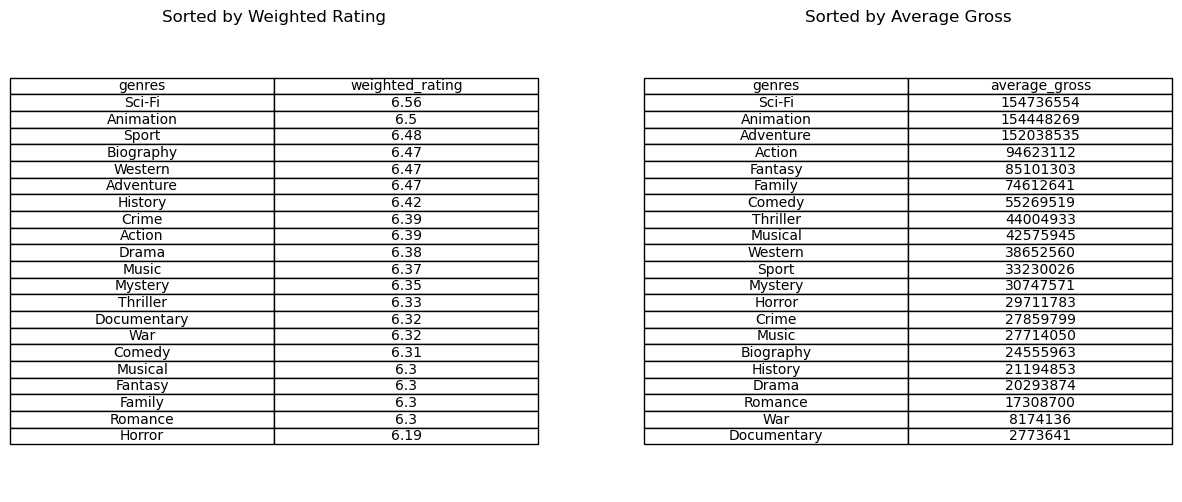

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].axis('off')
ax[0].table(cellText=sorted_by_weighted_rating_cleaned.values,
            colLabels=sorted_by_weighted_rating_cleaned.columns,
            cellLoc='center',
            loc='center')
ax[0].set_title('Sorted by Weighted Rating')

ax[1].axis('off')
ax[1].table(cellText=sorted_by_average_gross_cleaned.values,
            colLabels=sorted_by_average_gross_cleaned.columns,
            cellLoc='center',
            loc='center')
ax[1].set_title('Sorted by Average Gross')

Text(0.5, 1.0, 'Average Gross by Genre')

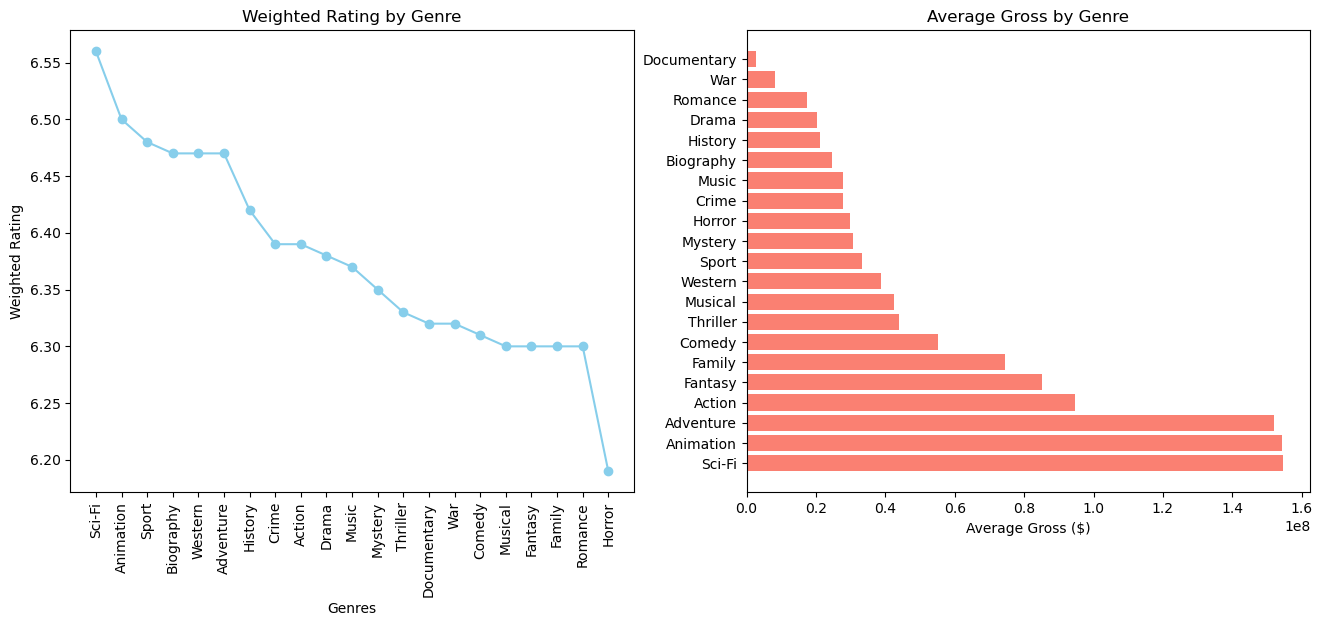

In [161]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(sorted_by_weighted_rating['genres'], sorted_by_weighted_rating['weighted_rating'], marker='o', color='skyblue')
ax[0].set_xlabel('Genres')
ax[0].set_ylabel('Weighted Rating')
ax[0].set_title('Weighted Rating by Genre')
ax[0].tick_params(axis='x', rotation=90)

ax[1].barh(sorted_by_average_gross['genres'], sorted_by_average_gross['average_gross'], color='salmon')
ax[1].set_xlabel('Average Gross ($)')
ax[1].set_title('Average Gross by Genre')

According to the charts, we can see that Sci-Fi is the greatest performing genre in both ratings and gross.

#### Next we need to find out what is best runtime compared to the ratings and average gross. 

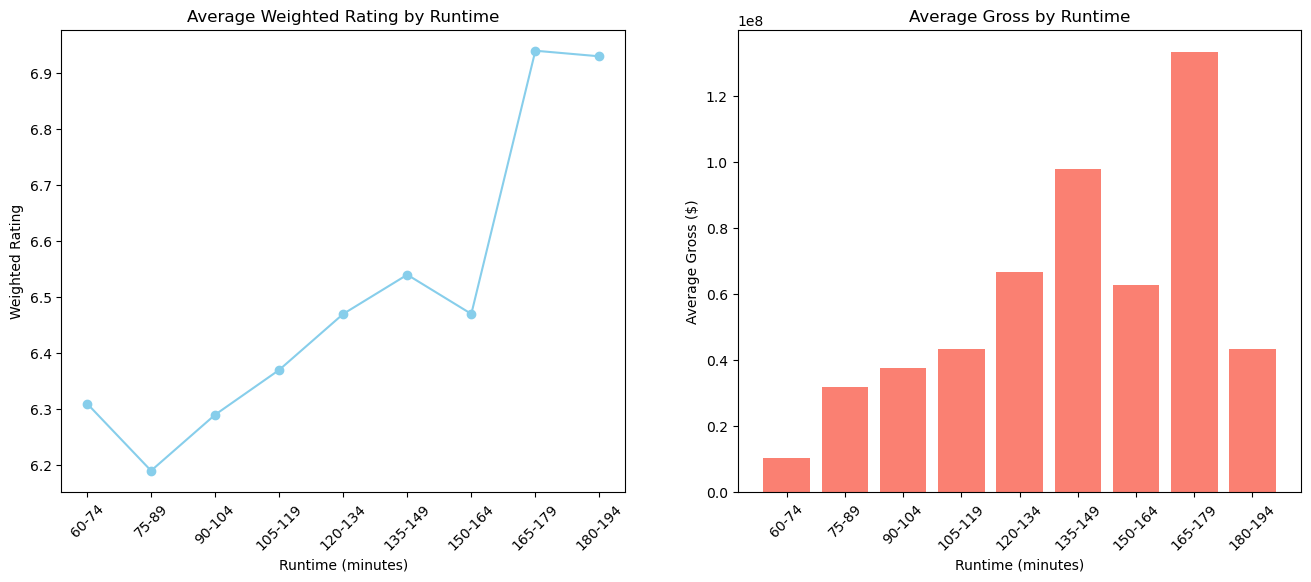

In [162]:
runtime_weighted['runtime_minutes'] = pd.to_numeric(runtime_weighted['runtime_minutes'], errors='coerce')
runtime_weighted = runtime_weighted.dropna(subset=['runtime_minutes'])

# Filter out movies with runtime_minutes < 60 minutes
runtime_weighted = runtime_weighted[runtime_weighted['runtime_minutes'] >= 60]

# Define integer bins for 15-minute intervals
max_runtime = int(runtime_weighted['runtime_minutes'].max())  # Convert max runtime to integer
bins = list(range(0, max_runtime + 15, 15))  # Define bins from 0 up to the max runtime, in 15-minute steps
labels = [f'{i}-{i+14}' for i in bins[:-1]]  # Create labels for the bins

# Assign bins to DataFrame
runtime_weighted['runtime_bins'] = pd.cut(runtime_weighted['runtime_minutes'], bins=bins, labels=labels, right=False)

# Calculate average weighted rating and average gross for each runtime bin
runtime_performance = runtime_weighted.groupby('runtime_bins').agg({
    'weighted_rating': 'mean',
    'average_gross': 'mean'
}).reset_index()

# Clean data
runtime_performance['weighted_rating'] = runtime_performance['weighted_rating'].fillna(0).round(2)
runtime_performance['average_gross'] = runtime_performance['average_gross'].fillna(0).astype(int)

# Remove empty bins (if any) where there are no movies
runtime_performance = runtime_performance[runtime_performance['average_gross'] > 0]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for average weighted rating by runtime
ax[0].plot(runtime_performance['runtime_bins'], runtime_performance['weighted_rating'], marker='o', color='skyblue')
ax[0].set_xlabel('Runtime (minutes)')
ax[0].set_ylabel('Weighted Rating')
ax[0].set_title('Average Weighted Rating by Runtime')
ax[0].tick_params(axis='x', rotation=45)

# Plot for average gross by runtime
ax[1].bar(runtime_performance['runtime_bins'], runtime_performance['average_gross'], color='salmon')
ax[1].set_xlabel('Runtime (minutes)')
ax[1].set_ylabel('Average Gross ($)')
ax[1].set_title('Average Gross by Runtime')
ax[1].tick_params(axis='x', rotation=45)

As we can see between the charts, the best runtime is anywhere around 165-179 mins.

#### Finally we will see the best performing Director.

In [163]:
# Group by director and calculate average weighted rating
director_performance = money_movies.groupby('Director').agg({
    'weighted_rating': 'mean',
    'average_gross': 'mean', 
    'Movie': 'count'
}).rename(columns={'Movie': 'num_movies'}).reset_index()

# Sort by average weighted rating
director_performance = director_performance.sort_values(by='num_movies', ascending=False)
director_performance.head(10)

,Director,weighted_rating,average_gross,num_movies
323,Clint Eastwood,6.530893,9.110714e+07,7
1726,Woody Allen,6.508677,3.217143e+07,7
1377,Ridley Scott,6.530443,1.423071e+08,7
1582,Steven Spielberg,6.849750,1.384643e+08,7
1411,Rohit Shetty,6.158024,4.528083e+06,6
981,Lasse Hallström,6.386118,5.956667e+07,6
1288,Peter Farrelly,6.167212,6.600000e+07,5
642,Hirokazu Koreeda,6.331602,9.804600e+05,5
1581,Steven Soderbergh,6.297140,3.988000e+07,5
1418,Ron Howard,6.349765,7.889000e+07,5


In [164]:
director_whole = money_movies.groupby('Director').agg({
    'weighted_rating': 'mean',
    'average_gross': 'mean', 
    'Movie': 'count', 
    'genres': lambda x: ', '.join(set(', '.join(x).split(', ')))  # Combine and deduplicate genres
}).rename(columns={'Movie': 'num_movies'}).reset_index()

# Sort by average weighted rating
director_whole = director_whole.sort_values(by='weighted_rating', ascending=False)
director_whole.head(10)

,Director,weighted_rating,average_gross,num_movies,genres
309,Christopher Nolan,8.214051,3.894750e+08,4,"Action,Adventure,Sci-Fi, Action,Thriller, Adve..."
994,Lee Unkrich,7.880285,4.685250e+08,2,"Adventure,Animation,Comedy"
1421,Ronnie Del Carmen,7.850278,4.288000e+08,1,"Adventure,Animation,Comedy"
1281,Pete Docter,7.850278,4.288000e+08,1,"Adventure,Animation,Comedy"
1325,Quentin Tarantino,7.840061,1.452750e+08,2,"Crime,Drama,Mystery, Drama,Western"
1633,Tim Miller,7.781162,3.915500e+08,1,"Action,Adventure,Comedy"
27,Adrian Molina,7.760474,4.035500e+08,1,"Adventure,Animation,Comedy"
137,Anthony Russo,7.757721,5.375333e+08,3,"Action,Adventure,Sci-Fi"
790,Joe Russo,7.757721,5.375333e+08,3,"Action,Adventure,Sci-Fi"
1075,Martin Scorsese,7.679794,1.454333e+08,3,"Adventure,Drama,Family, Mystery,Thriller, Biog..."


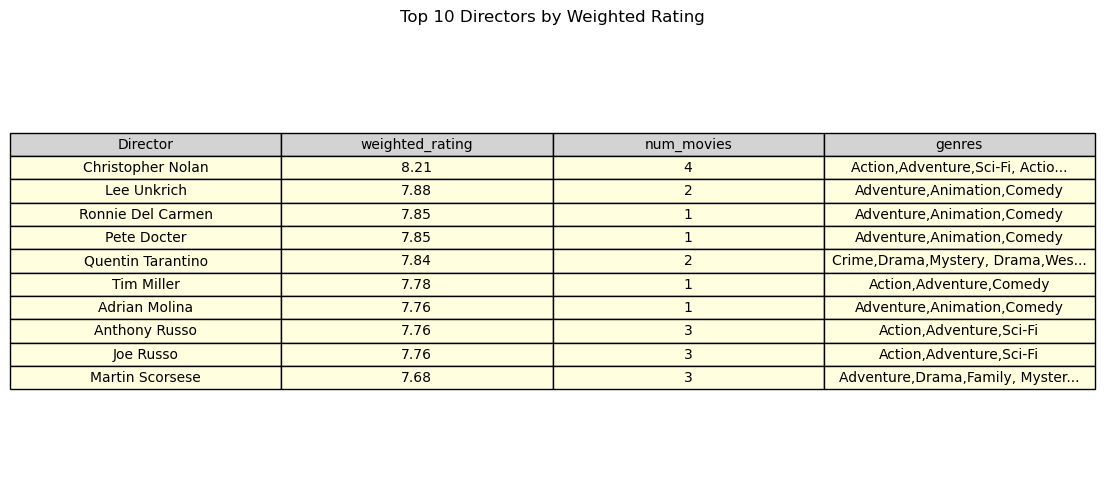

Text(0.5, 1.0, 'Top 10 Directors by Average Gross')

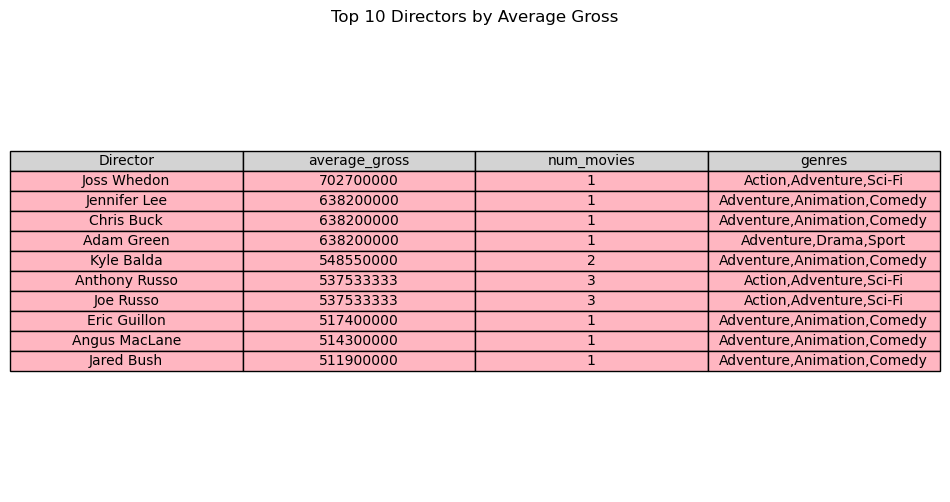

In [165]:
# Sort by weighted_rating and round to 2 decimal points
top_10_weighted_rating = director_whole.sort_values(by='weighted_rating', ascending=False)
top_10_weighted_rating['weighted_rating'] = top_10_weighted_rating['weighted_rating'].round(2)

# Truncate genres column to 30 characters for display
top_10_weighted_rating['genres'] = top_10_weighted_rating['genres'].apply(lambda x: (x[:30] + '...') if len(x) > 30 else x)

# Drop the average_gross column
top_10_weighted_rating_cleaned = top_10_weighted_rating.drop(columns=['average_gross']).head(10)

# Sort by average_gross and remove decimals
top_10_average_gross = director_whole.sort_values(by='average_gross', ascending=False)
top_10_average_gross['average_gross'] = top_10_average_gross['average_gross'].astype(int)

# Truncate genres column to 30 characters for display
top_10_average_gross['genres'] = top_10_average_gross['genres'].apply(lambda x: (x[:30] + '...') if len(x) > 30 else x)

# Drop the weighted_rating column
top_10_average_gross_cleaned = top_10_average_gross.drop(columns=['weighted_rating']).head(10)

# Plotting Top 10 Directors by Weighted Rating
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=top_10_weighted_rating_cleaned.values,
                 colLabels=top_10_weighted_rating_cleaned.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['lightgrey']*len(top_10_weighted_rating_cleaned.columns),
                 cellColours=[['lightyellow']*len(top_10_weighted_rating_cleaned.columns)]*len(top_10_weighted_rating_cleaned))
table.auto_set_font_size(False)
table.set_fontsize(10)  # Adjust font size for readability
table.scale(1.4, 1.4)   # Scale table to fit within the figure
plt.title('Top 10 Directors by Weighted Rating')
plt.show()

# Plotting Top 10 Directors by Average Gross
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=top_10_average_gross_cleaned.values,
                 colLabels=top_10_average_gross_cleaned.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['lightgrey']*len(top_10_average_gross_cleaned.columns),
                 cellColours=[['lightpink']*len(top_10_average_gross_cleaned.columns)]*len(top_10_average_gross_cleaned))
table.auto_set_font_size(False)
table.set_fontsize(10)  # Adjust font size for readability
table.scale(1.2, 1.2)   # Scale table to fit within the figure
plt.title('Top 10 Directors by Average Gross')

Finally, we have the top 10 Directors. We achieved our final piece of the puzzle.

## Business Recommendation 1

Understanding what is the best genre to start producing movies in is a great stepping stone. According to my 2 charts, you can look at top 5 for each best performing genre. What do we see? That Sci-Fi and Animation are the best performing genres. You can see that they have the best Rating performance as well as the best Gross performance. Either can be a great bang for your buck. 

## Business Recommendation 2

In this day in age, people do not have the best attention span. Nobody wants to be bored watching a long movie, or even not get enough from watching a short film. What can we see from the charts? Runtimes between 165-179 have shown the best performance based on Ratings and Gross.

## Business Recommendation 3

A movie is nothing without a great director that can best tell the story in their style. Finding a director could be difficult but we have a lot of options to go through. In my charts, I showed the best Directors according to their Ratings and Gross. What can we do? Well, try acquiring the top performing director per category. Either, Christopher Nolan who has shown that even after 4 movies, he is the top performing Director. Or Joss Whedon that he has accumulated the highest gross. You can also go into more detail. We have each directors genre. We can assess the best performing Director while also looking into their genre.